# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

The new format for the SAT was released in March 2016. As an employee of the College Board, my team and I will be studying the statewide participation and results. Thereafter, providing recommendation where money is best spent to improve SAT participation rates.Apart from using SAT datasets, ACT datasets will be used as a comparison, to further understand its relation and implication to SAT.This will be done through statistical studies and presented in the form of slides and reports aiming to appraise the executives in the College Board as an effort to increase the participation rate in states where the rates are low.

## Executive Summary

### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# Reading the csv file of SAT and ACT in 2017 and assigning it to a variable each. 
sat_2017 = pd.read_csv(r"..\data\sat_2017.csv")
act_2017 = pd.read_csv(r"..\data\act_2017.csv")

In [3]:
# Using ".info()" to find out the Range Index, Columns, Presence of any Null data within the dataset and its data type
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [4]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [5]:
# Using ".min() and .max()" to find the minimum and maximum values of the respective columns within SAT 2017
print("SAT 2017's Evidence Based Reading and Writing min and max scores are {} and {}.".format(sat_2017["Evidence-Based Reading and Writing"].min(), sat_2017["Evidence-Based Reading and Writing"].max()))
print("SAT 2017's Math min and max scores are {} and {}.".format(sat_2017.Math.min(), sat_2017.Math.max()))
print("SAT 2017's Total min and max scores are {} and {}.".format(sat_2017.Total.min(), sat_2017.Total.max()))

SAT 2017's Evidence Based Reading and Writing min and max scores are 482 and 644.
SAT 2017's Math min and max scores are 52 and 651.
SAT 2017's Total min and max scores are 950 and 1295.


In [6]:
# Using ".min() and .max()" to find the minimum and maximum values of the overall dataset split by the columns within SAT 2017
# This provides a summary view of the min and max values of each component and could also be a means to check for potential outliers within the data
# An example of a potential outlier would be the min value of Science in ACT 2017 where the lowest was recorded as 2.3 which falls outside the normal range.
act_2017.min(), act_2017.max()

(State            Alabama
 Participation        60%
 English             16.3
 Math                  18
 Reading             18.1
 Science              2.3
 Composite           17.8
 dtype: object,
 State            Wyoming
 Participation        98%
 English             25.5
 Math                25.3
 Reading               26
 Science             24.9
 Composite           25.5
 dtype: object)

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [7]:
# .head() allows the user to view the 1st 10 rows of the data 
# In this instance, the 1st 10 rows of SAT 2017 results are shown
# to find out about the last 10 rows, use ".tail()"
sat_2017[:10]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [8]:
# In this instance, the 1st 10 rows of ACT 2017 results are shown
act_2017[:10]

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

**Answer:**<br>
In both datasets, there are a few key observations:<br>
- In the SAT dataset,  there are a total of 51 rows and 5 columns representing the states, SAT subjects(inclusive of total score) and participation rate of each state. The ACT dataset consist 52 rows (inclusive of national scoring) and 7 columns represening the states, act subjects(inclusive of composite score) and participation rate of each state.<br>
- Lower the participation rate within a state, the higher the source of the test.<br>
- Most states with high participation rates in one test will have a low participation rates in another, which often means that states that have high averages on one test, have low averages for the other. <br><br>

#### 4a. Does the data look complete? 

**Answer:** <br>
No as there are some outliers/incorrect data points <br>
Example: <br>
(1) Under SAT 2017, the Maths score for Maryland was 52 which is incorrect as compared to the orignal dataset<br>
(2) SAT 2017 did not reflect its national scoring as compared to ACT 2017<br>
(3) Under ACT 2017, the Science score for Maryland was 2.3 which is incorrect as compared to the orignal dataset<br>
(4) Under ACT 2017, the Composite score for Wyoming has an additional "x" as it is reflected as "20.2x"<br><br>

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

**Answer:**<br>
For SAT:<br>
Each SAT section is scored between 200 - 800 and the overall is scored between 400 - 1600 (the sum of two sections)<br>
(Source: https://blog.prepscholar.com/whats-the-highest-new-sat-score-possible#:~:text=The%20Highest%20Possible%20SAT%20Score,-As%20I%20mentioned&text=Each%20has%20a%20maximum%20of,1600%20(2016%2Dpresent).)<br>

For ACT:<br>
Each ACT section, and the overall composite score, are scored between 1 and 36.<br><br>

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [9]:
# ".loc[]" to location and followed by an action by the using. 
# as mentioned above for SAT 2017, the math for maryland is incorrect. Hence, the value was replaced with the original value

sat_2017.loc[20, 'Math'] = 524

In [10]:
# To check if the value has been successfully replaced
sat_2017[20:21]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


In [11]:
# For ACT 2017, other than replacing the values for Wyoming and Maryland, the national row was removed to faciliate an accurate comparison in the later part of the project
act_2017.loc[51, 'Composite'] = 20.2
act_2017.loc[21, "Science"] = 23.2
act_2017.drop(0, inplace = True)

In [12]:
# To check if the values has been successfully replaced and dropping of the national row
act_2017

,State,Participation,English,Math,Reading,Science,Composite
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2
10,Florida,73%,19.0,19.4,21.0,19.4,19.8


#### 5. What are your data types? 
Display the data types of each feature. 

In [13]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [14]:
# ".info()" provides a complete information about the dataset but to check specifically towards the data type we can run data.dtypes also
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [15]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          51 non-null     object 
 1   Participation  51 non-null     object 
 2   English        51 non-null     float64
 3   Math           51 non-null     float64
 4   Reading        51 non-null     float64
 5   Science        51 non-null     float64
 6   Composite      51 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.2+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**Answer:** <br>
(1) Participation rate should be captured as a float data type as it is percentage which is suppose to be numerical numbers<br>
(2) Composite should be a float and not an object as it is the average of all the subject  within act<br>

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [16]:
# To replace the individual row directly, considering the data type is an object, ".str.replace("", "") followed by astype()"
# This action will replace non-integer values with nothing and change the data type as float 
# for "\d" When the UNICODE flag is not specified, matches any non-digit character; this is equivalent to the set [^0-9]. 
# With UNICODE, it will match anything other than character marked as digits in the Unicode character properties database.

# act_2017['Participation'] = act_2017['Participation'].str.replace(r'\D', '').astype(float)

In [17]:
# A function was created to change any str to float and replace '%' with nothing to faciliate the transition of string to float
def str_to_float(string):
    num = float(string.replace("%", ''))
    return num

- Fix any individual values preventing other columns from being the appropriate type.

In [18]:
# .apply() to apply the action to the indicated columns
# In this instance, participation in SAT 2017 was being change to float
sat_2017['Participation'] = sat_2017['Participation'].apply(str_to_float)

In [19]:
# In this instance, participation in ACT 2017 was being change to float
act_2017['Participation'] = act_2017['Participation'].apply(str_to_float)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [20]:
# In this instance, Composite in ACT 2017 was being change to float
act_2017['Composite'] = act_2017['Composite'].astype(float)

- Display the data types again to confirm they are correct.

In [21]:
# To check if data type was successfully changed and there is a return in value as the number of non-null counts remains the same
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [22]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          51 non-null     object 
 1   Participation  51 non-null     float64
 2   English        51 non-null     float64
 3   Math           51 non-null     float64
 4   Reading        51 non-null     float64
 5   Science        51 non-null     float64
 6   Composite      51 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.2+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [23]:
# .columns is check the currenting naming convention for the columns within ACT 2017 
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [24]:
# .columns is check the currenting naming convention for the columns within SAT 2017
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [25]:
# Following the suggestion in the guideline, any spaces are being replace with underscore for ACT 2017
act_2017.columns = act_2017.columns.str.lower().str.replace(" ","_")
act_2017.columns

Index(['state', 'participation', 'english', 'math', 'reading', 'science',
       'composite'],
      dtype='object')

In [26]:
# Following the suggestion in the guideline, any spaces are being replace with underscore for SAT 2017
sat_2017.columns = sat_2017.columns.str.lower().str.replace(" ","_").str.replace("-","_")
sat_2017.columns

Index(['state', 'participation', 'evidence_based_reading_and_writing', 'math',
       'total'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

**Data Dictionary for SAT and ACT in 2017**

|S/N|Feature|Data Type|Dataset|Description|
|---|---|---|---|---|
|1|**state**|*object*|ACT 2017|Name of the stats in US| 
|2|**participation**|*float*|ACT 2017|The percentage of participation of each state that are taking ACT in 2017 ranging from (0 - 100)|
|3|**english**|*float*|ACT 2017|The english score for ACT 2017 ranging from (1 - 36)|
|4|**math**|*float*|ACT 2017|The Math score for ACT 2017 ranging from (1 - 36)|
|5|**reading**|*flaot*|ACT 2017|The Reading score for ACT 2017 ranging from (1 - 36)|
|6|**science**|*float*|ACT 2017|The Science score for ACT 2017 ranging from (1 - 36)|
|7|**composite**|*float*|ACT 2017|The Composite score for ACT 2017 ranging from (1 - 36)|
|8|**state**|*object*|SAT 2017|Name of the stats in US|
|9|**participation**|*float*|SAT 2017|The percentage of participation of each state for SAT 2017 ranging from (0 - 100)|
|10|**evidence_based_reading_and_writing**|*float*|SAT 2017|The Evidence Based Reading and Writing score for ACT 2017 ranging from (1 - 36)|
|11|**math**|*float*|SAT 2017|The Math score for ACT 2017 ranging from (1 - 36)|
|12|**total**|*float*|SAT 2017|The Total score for ACT 2017 ranging from (1 - 36)|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

The national scoring row in the act_2017 has been dropped above<br>
code for reference: act_2017.drop([0], inplace = True)<br>

In [28]:
act_2017

,state,participation,english,math,reading,science,composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8
6,Colorado,100.0,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2
8,Delaware,18.0,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2
10,Florida,73.0,19.0,19.4,21.0,19.4,19.8


In [29]:
sat_2017

,state,participation,evidence_based_reading_and_writing,math,total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055
5,Colorado,11.0,606,595,1201
6,Connecticut,100.0,530,512,1041
7,Delaware,100.0,503,492,996
8,District of Columbia,100.0,482,468,950
9,Florida,83.0,520,497,1017


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [30]:
# creating a new dataframe with the inputs from ACT 2017 and SAT 2017 using merge
# merge on the parameters of "outer" and "state" to allow mapping of all values within the two datasets using the name of state as a reference point between the datasets
# verify the data by calling the dataframe and checking if all columns are being included with accruate values
combined_2017 = pd.merge(act_2017, sat_2017, how ='outer', on ="state")
combined_2017.head()

,state,participation_x,english,math_x,reading,science,composite,participation_y,evidence_based_reading_and_writing,math_y,total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


In [31]:
# renaming the columns of the dataframe to avoid confusion and faciliate ease of calling the columns for subsequent usage of it
combined_2017.rename(columns={
    "participation_x" : "act_participation_2017",
    "english" : "act_english_2017",
    "math_x" : "act_math_2017",
    "reading" : "act_reading_2017",
    "science" : "act_science_2017",
    "composite" : "act_composite_2017",
    "participation_y" : "sat_participation_2017",
    "evidence_based_reading_and_writing" : "sat_evidence_based_reading_and_writing_2017",
    "math_y" : "sat_math_2017",
    "total" : "sat_total_2017"
}, inplace = True)

In [32]:
combined_2017.head()

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_evidence_based_reading_and_writing_2017,sat_math_2017,sat_total_2017
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [33]:
# upon cleaning and merging of the datasets, we can transfer it to a new csv using .to_csv(filename, indexing[True/False])
combined_2017.to_csv(r'..\data\combined_2017.csv', index=True)

In [34]:
combined_2017.head()

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_evidence_based_reading_and_writing_2017,sat_math_2017,sat_total_2017
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [35]:
# reading the csv file of SAT and ACT in 2018 and assigning it to a variable for cleaning of data prior to further analysis of the data
sat_2018 = pd.read_csv(r"..\data\sat_2018.csv")
act_2018 = pd.read_csv(r"..\data\act_2018_updated.csv")

In [36]:
#verifying if the parimeters are similar as compared to SAT 2017
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [37]:
# checking for any potential outliers and understanding the dataset.
# for this instance, the participation was indentified to be an object.
# a follow up action to change the data type was required to faciliate further analysis
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [38]:
# replacing the data type of participation in SAT 2018 to the appropriate data type 
sat_2018['Participation'] = sat_2018['Participation'].apply(str_to_float)

In [39]:
# replacing the special symbols/chracters in the columns
sat_2018.columns = sat_2018.columns.str.lower().str.replace(" ","_").str.replace("-","_")
sat_2018.columns

Index(['state', 'participation', 'evidence_based_reading_and_writing', 'math',
       'total'],
      dtype='object')

In [40]:
# verifying if the data has been successfully renamed. renaming the columns
sat_2018.head()

,state,participation,evidence_based_reading_and_writing,math,total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [41]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   state                               51 non-null     object 
 1   participation                       51 non-null     float64
 2   evidence_based_reading_and_writing  51 non-null     int64  
 3   math                                51 non-null     int64  
 4   total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [42]:
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [43]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [44]:
# replacing the data type of percentage of student tested in act 2018 to the appropriate data type 
act_2018['Percentage of Students Tested'] = act_2018['Percentage of Students Tested'].astype(float)

In [45]:
# renaming the columns
act_2018.columns = act_2018.columns.str.lower().str.replace(" ","_")
act_2018.columns

Index(['state', 'percentage_of_students_tested', 'average_composite_score',
       'average_english_score', 'average_math_score', 'average_reading_score',
       'average_science_score'],
      dtype='object')

In [46]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          51 non-null     object 
 1   percentage_of_students_tested  51 non-null     float64
 2   average_composite_score        51 non-null     float64
 3   average_english_score          51 non-null     float64
 4   average_math_score             51 non-null     float64
 5   average_reading_score          51 non-null     float64
 6   average_science_score          51 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [47]:
#combining the ACT and SAT 2018 datasets as one dataset using state column as the condition
combined_2018 = pd.merge(act_2018, sat_2018, how ='outer', on ="state")
combined_2018.head()

,state,percentage_of_students_tested,average_composite_score,average_english_score,average_math_score,average_reading_score,average_science_score,participation,evidence_based_reading_and_writing,math,total
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0,6.0,595,571,1166
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7,43.0,562,544,1106
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2,29.0,577,572,1149
3,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4,5.0,592,576,1169
4,California,27.0,22.7,22.5,22.5,23.0,22.1,60.0,540,536,1076


In [48]:
#renaming all the columns to faciliate future analysis
combined_2018.rename(columns={
    "percentage_of_students_tested" : "act_participation_2018",
    "average_english_score" : "act_english_2018",
    "average_math_score" : "act_math_2018",
    "average_reading_score" : "act_reading_2018",
    "average_science_score" : "act_science_2018",
    "average_composite_score" : "act_composite_2018",
    "participation" : "sat_participation_2018",
    "evidence_based_reading_and_writing" : "sat_evidence_based_reading_and_writing_2018",
    "math" : "sat_math_2018",
    "total" : "sat_total_2018"
}, inplace = True)

In [49]:
combined_2018.head()

,state,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,sat_participation_2018,sat_evidence_based_reading_and_writing_2018,sat_math_2018,sat_total_2018
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0,6.0,595,571,1166
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7,43.0,562,544,1106
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2,29.0,577,572,1149
3,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4,5.0,592,576,1169
4,California,27.0,22.7,22.5,22.5,23.0,22.1,60.0,540,536,1076


In [50]:
# putting the dataset into a csv file
combined_2018.to_csv(r'..\data\combined_2018.csv', index=True) 

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [51]:
#combining the dataset for SAT and ACT in both 2017 and 2018
combined_final = pd.merge(combined_2017, combined_2018, how ='outer', on ="state")
combined_final.head()

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_evidence_based_reading_and_writing_2017,sat_math_2017,...,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,sat_participation_2018,sat_evidence_based_reading_and_writing_2018,sat_math_2018,sat_total_2018
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,...,100.0,19.1,18.9,18.3,19.6,19.0,6.0,595,571,1166
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,...,33.0,20.8,19.8,20.6,21.6,20.7,43.0,562,544,1106
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,...,66.0,19.2,18.2,19.4,19.5,19.2,29.0,577,572,1149
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,...,100.0,19.4,19.1,18.9,19.7,19.4,5.0,592,576,1169
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,...,27.0,22.7,22.5,22.5,23.0,22.1,60.0,540,536,1076


In [52]:
#transfering the dataset into a csv file
combined_final.to_csv(r'C:\Users\benja\dsi18-workarea\Project1234\project_1\data\final.csv', index=True) 

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [53]:
#statistical data of every component in the combined dataset for SAT and ACT in 2017 and 2018
# ".describe() looks the user to see the count, mean, standard deviation, min and max values, and the percentile of the values within the columns in the range of 25, 50, and 75%"
pd.DataFrame(combined_final).describe().T

,count,mean,std,min,25%,50%,75%,max
act_participation_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_2017,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_composite_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat_participation_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_evidence_based_reading_and_writing_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [54]:
# Creating a function to calculate the standard deviation for the components within SAT and ACT

def standard_deviation(col):
    sum_values = 0
    mean = combined_final[col].mean()
    for value in combined_final[col]:
        # Calculate sum of squared distance from each data point to the mean
        sum_values += (value - mean) ** 2
    # The index is counted as an extra row, hence len - 1
    return (sum_values/(len(combined_final[col]) - 1)) ** 0.5

In [55]:
# Source: https://stackabuse.com/calculating-variance-and-standard-deviation-in-python/

def variance(data, ddof=1):
    n = len(data)
    mean = sum(data) / n
    return sum((x - mean) ** 2 for x in data) / (n - ddof)

def stdev(data):
    var = variance(data)
    std_dev = math.sqrt(var)
    return std_dev

In [56]:
combined_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   state                                        51 non-null     object 
 1   act_participation_2017                       51 non-null     float64
 2   act_english_2017                             51 non-null     float64
 3   act_math_2017                                51 non-null     float64
 4   act_reading_2017                             51 non-null     float64
 5   act_science_2017                             51 non-null     float64
 6   act_composite_2017                           51 non-null     float64
 7   sat_participation_2017                       51 non-null     float64
 8   sat_evidence_based_reading_and_writing_2017  51 non-null     int64  
 9   sat_math_2017                                51 non-null     int64  
 10  sat_

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [57]:
#Code:https://www.datacamp.com/community/tutorials/python-dictionary-comprehension
#double_dict1 = {k:v*2 for (k,v) in dict1.items()}
print("Standard Deviation for ACT 2017 English is {}.".format(standard_deviation("act_english_2017")))
print("Standard Deviation for ACT 2017 Math is {}.".format(standard_deviation("act_math_2017")))
print("Standard Deviation for ACT 2017 Reading is {}.".format(standard_deviation("act_reading_2017")))
print("Standard Deviation for ACT 2017 Science is {}.".format(standard_deviation("act_science_2017")))
print("Standard Deviation for ACT 2017 Composite is {}.".format(standard_deviation("act_composite_2017")))
print("Standard Deviation for SAT 2017 Evidence Based Reading and Writing is {}.".format(standard_deviation("sat_evidence_based_reading_and_writing_2017")))
print("Standard Deviation for SAT 2017 Math is {}.".format(standard_deviation("sat_math_2017")))
print("Standard Deviation for SAT 2017 Total is {}.".format(standard_deviation("sat_total_2017")))
print(" ")
print("Standard Deviation for ACT 2018 Composite is {}.".format(standard_deviation("act_composite_2018")))
print("Standard Deviation for ACT 2018 English is {}.".format(standard_deviation("act_english_2018")))
print("Standard Deviation for ACT 2018 Math is {}.".format(standard_deviation("act_math_2018")))
print("Standard Deviation for ACT 2018 Reading is {}.".format(standard_deviation("act_reading_2018")))
print("Standard Deviation for ACT 2018 Science is {}.".format(standard_deviation("act_science_2018")))
print("Standard Deviation for SAT 2018 Evidence Based Reading and Writing is {}.".format(standard_deviation("sat_evidence_based_reading_and_writing_2018")))
print("Standard Deviation for SAT 2018 Math is {}.".format(standard_deviation("sat_math_2018")))
print("Standard Deviation for SAT 2018 Total is {}.".format(standard_deviation("sat_total_2018")))

Standard Deviation for ACT 2017 English is 2.35367713980303.
Standard Deviation for ACT 2017 Math is 1.9819894936505533.
Standard Deviation for ACT 2017 Reading is 2.0672706264873146.
Standard Deviation for ACT 2017 Science is 1.7393530462812443.
Standard Deviation for ACT 2017 Composite is 2.020694891154341.
Standard Deviation for SAT 2017 Evidence Based Reading and Writing is 45.66690138768932.
Standard Deviation for SAT 2017 Math is 47.12139516560329.
Standard Deviation for SAT 2017 Total is 92.49481172519046.
 
Standard Deviation for ACT 2018 Composite is 2.1062781969951776.
Standard Deviation for ACT 2018 English is 2.4463562339793055.
Standard Deviation for ACT 2018 Math is 2.035764538177723.
Standard Deviation for ACT 2018 Reading is 2.1672445684804105.
Standard Deviation for ACT 2018 Science is 1.8701137639716146.
Standard Deviation for SAT 2018 Evidence Based Reading and Writing is 47.50262737831599.
Standard Deviation for SAT 2018 Math is 47.77262322095955.
Standard Deviation

In [58]:
# To remove state as an input when applying the standard deviation function if not state will potentially have a return which is not need.
combined_final_std =[]
for x in combined_final.columns:
    if x != "state":
        combined_final_std.append(x)
  
#Use a dictionary comprehension to apply the standard deviation function to each numeric column in the dataframe
sd_dict = {col: (standard_deviation(col)) for col in combined_final_std}
sd_dict

{'act_participation_2017': 32.14084201588683,
 'act_english_2017': 2.35367713980303,
 'act_math_2017': 1.9819894936505533,
 'act_reading_2017': 2.0672706264873146,
 'act_science_2017': 1.7393530462812443,
 'act_composite_2017': 2.020694891154341,
 'sat_participation_2017': 35.276632270013046,
 'sat_evidence_based_reading_and_writing_2017': 45.66690138768932,
 'sat_math_2017': 47.12139516560329,
 'sat_total_2017': 92.49481172519046,
 'act_participation_2018': 34.08097623567245,
 'act_composite_2018': 2.1062781969951776,
 'act_english_2018': 2.4463562339793055,
 'act_math_2018': 2.035764538177723,
 'act_reading_2018': 2.1672445684804105,
 'act_science_2018': 1.8701137639716146,
 'sat_participation_2018': 37.31425633039196,
 'sat_evidence_based_reading_and_writing_2018': 47.50262737831599,
 'sat_math_2018': 47.77262322095955,
 'sat_total_2018': 94.15508275097599}

In [59]:
combined_final.describe()

,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_evidence_based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,sat_participation_2018,sat_evidence_based_reading_and_writing_2018,sat_math_2018,sat_total_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,39.803922,569.117647,556.882353,1126.098039,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,35.276632,45.666901,47.121395,92.494812,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,643.000000,655.000000,1298.000000


In [60]:
# To better understand why divided by n-1 for an unbaised sample variance 
# Source: https://www.youtube.com/watch?v=Cn0skMJ2F3c

#ddof was set to 1 to get the accurate reading of standard deviation of the dataset
np.std(combined_final, ddof=1)

act_participation_2017                         32.140842
act_english_2017                                2.353677
act_math_2017                                   1.981989
act_reading_2017                                2.067271
act_science_2017                                1.739353
act_composite_2017                              2.020695
sat_participation_2017                         35.276632
sat_evidence_based_reading_and_writing_2017    45.666901
sat_math_2017                                  47.121395
sat_total_2017                                 92.494812
act_participation_2018                         34.080976
act_composite_2018                              2.106278
act_english_2018                                2.446356
act_math_2018                                   2.035765
act_reading_2018                                2.167245
act_science_2018                                1.870114
sat_participation_2018                         37.314256
sat_evidence_based_reading_and_

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

**Answer:**<br>
The manual calculation of standard deviation matches with the one with Pandas describe. However, it does not match with numpy's std as Pandas uses the unbiased estimator (N-1 in the denominator), whereas Numpy by default does not.<br>
To make numpy's std react the same, set ddof=1 to the functon.<br>
Source: https://stackoverflow.com/questions/24984178/different-std-in-pandas-vs-numpy<br><br>

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

##### Finding out the following: <br>
Which states have the highest and lowest participation rates for the:<br>
    **2017 SAT** | **2018 SAT** | **2017 ACT** | **2018 ACT**

In [61]:
# This function allows the user to display the min and max values within a dataset of a particular condition. 
# Source: https://stackoverflow.com/questions/42504984/python-pandas-select-both-head-and-tail/53311747#53311747
def display_n(df,n): 
    with pd.option_context('display.max_rows',n*2):
        display(df)

In [62]:
# To accurately display the dataframe showing the min and max value, the data has to be sorted first
display_n(combined_final[["state", 'sat_participation_2017']].sort_values('sat_participation_2017'), 5)

,state,sat_participation_2017
34,North Dakota,2.0
24,Mississippi,2.0
15,Iowa,2.0
25,Missouri,3.0
44,Utah,3.0
...,...,...
29,New Hampshire,96.0
22,Michigan,100.0
8,District of Columbia,100.0
7,Delaware,100.0


**Answer for states with lowest and highest participation in SAT 2017** 

The states with lowest participation were (1) North Dakota, (2) Mississippi, and (3) Iowa. <br>
The states with highest participation were (1)Connecticut, (2)Delaware, (3)District of Columbia, and (4) Michigan <br><br>

In [63]:
display_n(combined_final[["state", 'sat_participation_2018']].sort_values('sat_participation_2018'), 5)

,state,sat_participation_2018
34,North Dakota,2.0
50,Wyoming,3.0
41,South Dakota,3.0
27,Nebraska,3.0
49,Wisconsin,3.0
...,...,...
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
22,Michigan,100.0


In [64]:
combined_final[["state", 'sat_participation_2018']].sort_values('sat_participation_2018', ascending = False).head(6)

,state,sat_participation_2018
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
22,Michigan,100.0
12,Idaho,100.0
19,Maine,99.0


**Answer for states with lowest and highest participation in SAT 2018** 

The state with lowest participation was (1) North Dakota. <br>
The states with highest participation were (1)Colorado, (2)Connecticut, (3)Delaware, (4) Michigan, and (5) Idaho <br><br>

In [65]:
display_n(combined_final[["state", 'act_participation_2017']].sort_values('act_participation_2017'), 2)

,state,act_participation_2017
19,Maine,8.0
29,New Hampshire,18.0
...,...,...
36,Oklahoma,100.0
50,Wyoming,100.0


In [66]:
combined_final[["state", 'act_participation_2017']].sort_values('act_participation_2017', ascending = False).head(18)

,state,act_participation_2017
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
33,North Carolina,100.0
28,Nevada,100.0
26,Montana,100.0


**Answer for states with lowest and highest participation in ACT 2017** 

The state with lowest participation was (1) Maine <br>
The states with highest participation were (1)Alabama, (2)Kentucky, (3)Wisconsin, (4)Utah, (5)Tennessee, (6)South Carolina, (7)Oklahoma, (8)North Carolina, (9)Nevada, (10)Montana, (11)Mississippi, (12)Minnesota, (13)Louisiana, (14)Missouri, (15)Wyoming, (16)Colorado, and (17) Arkansas <br><br>

In [67]:
display_n(combined_final[["state", 'act_participation_2018']].sort_values('act_participation_2018'), 2)

,state,act_participation_2018
19,Maine,7.0
39,Rhode Island,15.0
...,...,...
36,Oklahoma,100.0
50,Wyoming,100.0


In [68]:
combined_final[["state", 'act_participation_2018']].sort_values('act_participation_2018', ascending = False).head(18)

,state,act_participation_2018
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
35,Ohio,100.0
33,North Carolina,100.0
28,Nevada,100.0


**Answer for states with lowest and highest participation in ACT 2018** 

The state with lowest participation was (1) Maine <br>
The states with highest participation were (1)Alabama, (2)Kentucky, (3)Wisconsin, (4)Utah, (5)Tennessee, (6)South Carolina, (7)Oklahoma, (8) Ohio, (9)North Carolina, (10)Nevada, (11)Nebraska, (12)Montana, (13)Mississippi, (14)Louisiana, (15)Missouri, (16)Wyoming, and (17) Arkansas <br><br>

##### Finding out the following: <br> 
Which states have the highest and lowest mean total/composite scores for the: <br>
    **2017 SAT** | **2018 SAT** | **2017 ACT** | **2018 ACT** <br>

In [69]:
display_n(combined_final[["state", 'sat_total_2017']].sort_values('sat_total_2017'), 2)

# combined_final[["state", 'sat_total_2017']].sort_values(by = "sat_total_2017", ascending = True).head(1)
# combined_final[["state", 'sat_total_2017']].sort_values(by = "sat_total_2017", ascending = True).tail(1)

,state,sat_total_2017
8,District of Columbia,950
7,Delaware,996
...,...,...
49,Wisconsin,1291
23,Minnesota,1295


**Answer for states with lowest and highest Total score in SAT 2017** 

The state with lowest score was District of Columbia.<br>
The states with highest score was Minnesota. <br><br>

In [70]:
display_n(combined_final[["state", 'sat_total_2018']].sort_values('sat_total_2018'), 2)

,state,sat_total_2018
8,District of Columbia,977
7,Delaware,998
...,...,...
49,Wisconsin,1294
23,Minnesota,1298


**Answer for states with lowest and highest Total score in SAT 2018** 

The state with lowest score was District of Columbia.<br>
The states with highest score was Minnesota. <br>

Observation: it is the same as SAT 2017.<br><br>

In [71]:
display_n(combined_final[["state", 'act_composite_2017']].sort_values('act_composite_2017'), 2)

,state,act_composite_2017
28,Nevada,17.8
24,Mississippi,18.6
...,...,...
21,Massachusetts,25.4
29,New Hampshire,25.5


**Answer for states with lowest and highest Composite score in ACT 2017** 

The state with lowest score was Nevada.<br>
The states with highest score was New Hampshire. <br><br>

In [72]:
display_n(combined_final[["state", 'act_composite_2018']].sort_values('act_composite_2018'), 2)

,state,act_composite_2018
28,Nevada,17.7
40,South Carolina,18.3
...,...,...
21,Massachusetts,25.5
6,Connecticut,25.6


**Answer for states with lowest and highest Composite score in ACT 2018** 

The state with lowest score was Nevada.<br>
The states with highest score was Connecticut. <br>
Observation: The highest scoring state changed from New Hampshire in 2017 to Connecticut in 2018.<br><br>

##### Finding out the following: <br> 
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

In [73]:
sat_part_a1718 = combined_final.loc[(combined_final["sat_participation_2017"] == 100 ) & (combined_final["sat_participation_2018"] != 100 )]
sat_part_a1718[["state", "sat_participation_2017", "sat_participation_2018"]]

,state,sat_participation_2017,sat_participation_2018
8,District of Columbia,100.0,92.0


In [74]:
sat_part_b1718 = combined_final.loc[(combined_final["sat_participation_2017"] != 100 ) & (combined_final["sat_participation_2018"] == 100 )]
sat_part_b1718[["state", "sat_participation_2017", "sat_participation_2018"]]

,state,sat_participation_2017,sat_participation_2018
5,Colorado,11.0,100.0
12,Idaho,93.0,100.0


**Answer for states with 100% participation on a given test (SAT) have a rate change year-to-year:** <br>
The following states observed to have meet the criteria were (1)District of Columbia, (2)Colorado, and (3)Idaho.<br><br>

In [75]:
act_part_a1718 = combined_final.loc[(combined_final["act_participation_2017"] == 100 ) & (combined_final["act_participation_2018"] != 100 )]
act_part_a1718[["state", "act_participation_2017", "act_participation_2018"]]

,state,act_participation_2017,act_participation_2018
5,Colorado,100.0,30.0
23,Minnesota,100.0,99.0


In [76]:
act_part_b1718 = combined_final.loc[(combined_final["act_participation_2017"] != 100 ) & (combined_final["act_participation_2018"] == 100 )]
act_part_b1718[["state", "act_participation_2017", "act_participation_2018"]]

,state,act_participation_2017,act_participation_2018
27,Nebraska,84.0,100.0
35,Ohio,75.0,100.0


**Answer for states with 100% participation on a given test (ACT) have a rate change year-to-year:** <br>
The following states observed to have meet the criteria were (1)Colorado, (2)Minnesota, (3)Nebraska, and (4)Ohio.<br><br>

In [77]:
sat_part_c1718 = combined_final.loc[(combined_final["sat_participation_2017"] > 50 ) & (combined_final["act_participation_2017"] >50 )]
sat_part_c1718[["state", "sat_participation_2017", "act_participation_2018"]]

,state,sat_participation_2017,act_participation_2018
9,Florida,83.0,66.0
10,Georgia,61.0,53.0
11,Hawaii,55.0,89.0


In [78]:
act_part_c1718 = combined_final.loc[(combined_final["act_participation_2018"] > 50 ) & (combined_final["sat_participation_2018"] > 50 )]
act_part_c1718[["state", "sat_participation_2018", "act_participation_2018"]]

,state,sat_participation_2018,act_participation_2018
9,Florida,56.0,66.0
10,Georgia,70.0,53.0
11,Hawaii,56.0,89.0
33,North Carolina,52.0,100.0
40,South Carolina,55.0,100.0


**Answer for states with >50% participation on *both* tests either year:** <br>
For 2017, The following states observed to have meet the criteria were (1)Florida, (2)Georgia, and (3)Hawaii.<br>
For 2018, The following states observed to have meet the criteria were (1)Florida, (2)Georgia, (3)Hawaii, (4)North Carolina, and (4)South Carolina.<br><br>

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

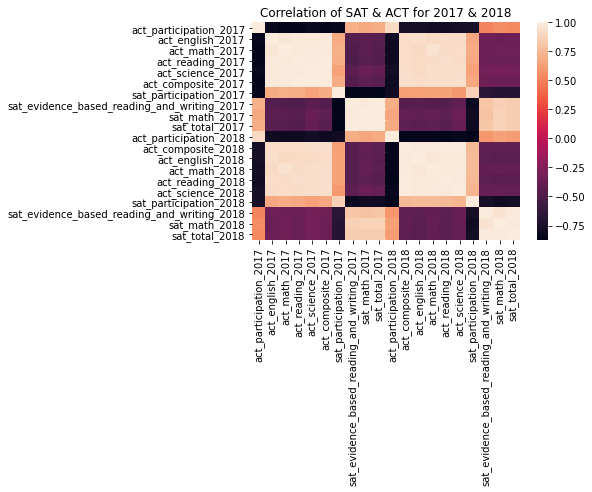

In [79]:
#finding the correlation between SAT and ACT in 2017 & 2018 and assigning it into a variable
combi = combined_final.corr();

#plotting the correlation using a heatmap
sns.heatmap(combi);
plt.title("Correlation of SAT & ACT for 2017 & 2018");

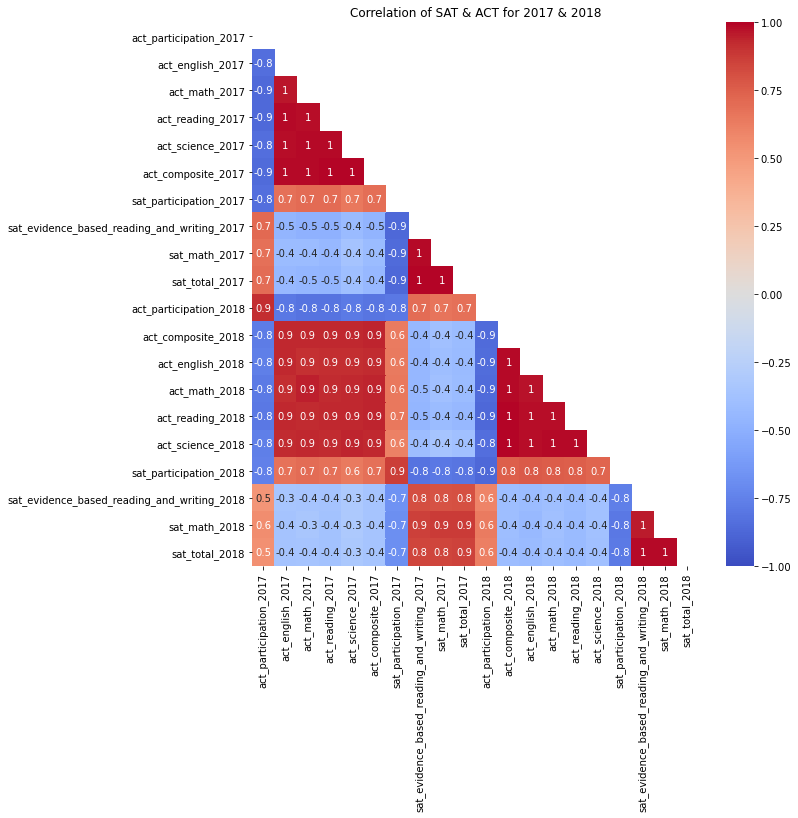

In [80]:
# To mask one half of the heatmap to better represent the correlation using the heatmap, use "np.triu()" to obtain the upper half value of the triangle
# Source: https://numpy.org/doc/stable/reference/generated/numpy.triu.html
mask = np.triu(combi.corr())
plt.figure(figsize = (10,10))

#annot shows the value of correlation between two components, cmap displays the colour based on the scheme selected, mask blocks the perimeter provided.
sns.heatmap(combi, annot=True, fmt=".1g", cmap="coolwarm",
           vmin=-1, vmax=1, mask=mask);
plt.title("Correlation of SAT & ACT for 2017 & 2018");

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [81]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,12)) #You'll want to specify your figsize
    fig.suptitle("Comparison of ACT & SAT for 2017 & 2018", fontsize=25) # Set titles for the main plot 
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
   
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i]) # Set titles for each subplot 
        ax[i].set_xlabel(list_of_xlabels[i]) # Set x labels for each subplot 
        ax[i].set_ylabel(list_of_ylabels[i]) # Set y labels for each subplot 
        ax[i].axvline(x=dataframe[column].median(), c="red") # draws a "red" line to denote the median in the graph 
        ax[i].axvline(x=dataframe[column].mean(), c="green") # draws a "green" line to denote the mean in the graph 

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [82]:
combined_final.columns

Index(['state', 'act_participation_2017', 'act_english_2017', 'act_math_2017',
       'act_reading_2017', 'act_science_2017', 'act_composite_2017',
       'sat_participation_2017', 'sat_evidence_based_reading_and_writing_2017',
       'sat_math_2017', 'sat_total_2017', 'act_participation_2018',
       'act_composite_2018', 'act_english_2018', 'act_math_2018',
       'act_reading_2018', 'act_science_2018', 'sat_participation_2018',
       'sat_evidence_based_reading_and_writing_2018', 'sat_math_2018',
       'sat_total_2018'],
      dtype='object')

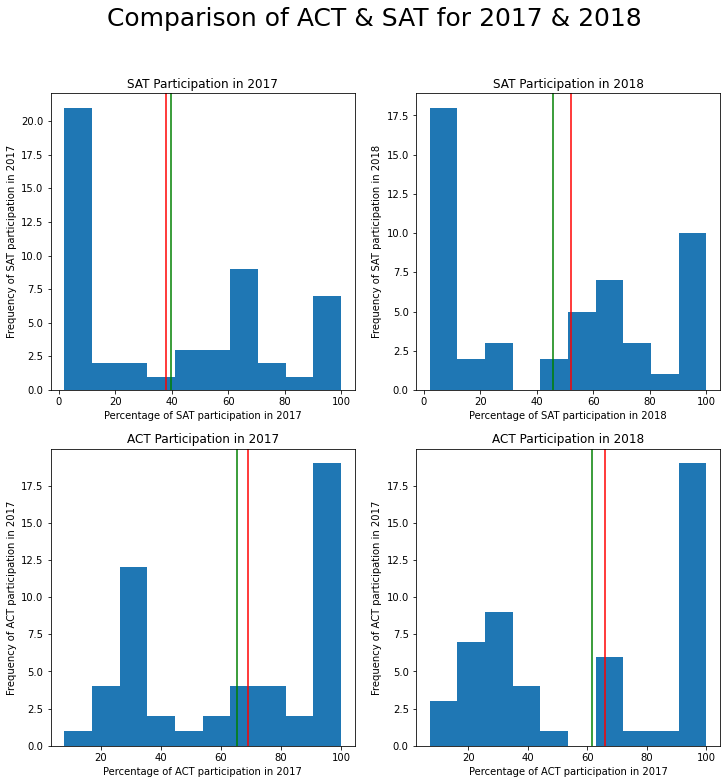

In [83]:
par_a = ["sat_participation_2017", "sat_participation_2018", "act_participation_2017", "act_participation_2018"]
par_b = ["SAT Participation in 2017", "SAT Participation in 2018", "ACT Participation in 2017", "ACT Participation in 2018"]
par_c = ["Percentage of SAT participation in 2017", "Percentage of SAT participation in 2018", 
         "Percentage of ACT participation in 2017", "Percentage of ACT participation in 2017"]
par_d = ["Frequency of SAT participation in 2017", "Frequency of SAT participation in 2018", 
         "Frequency of ACT participation in 2017", "Frequency of ACT participation in 2017"]
subplot_histograms(combined_final, par_a, par_b, par_c, par_d)
#subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels)

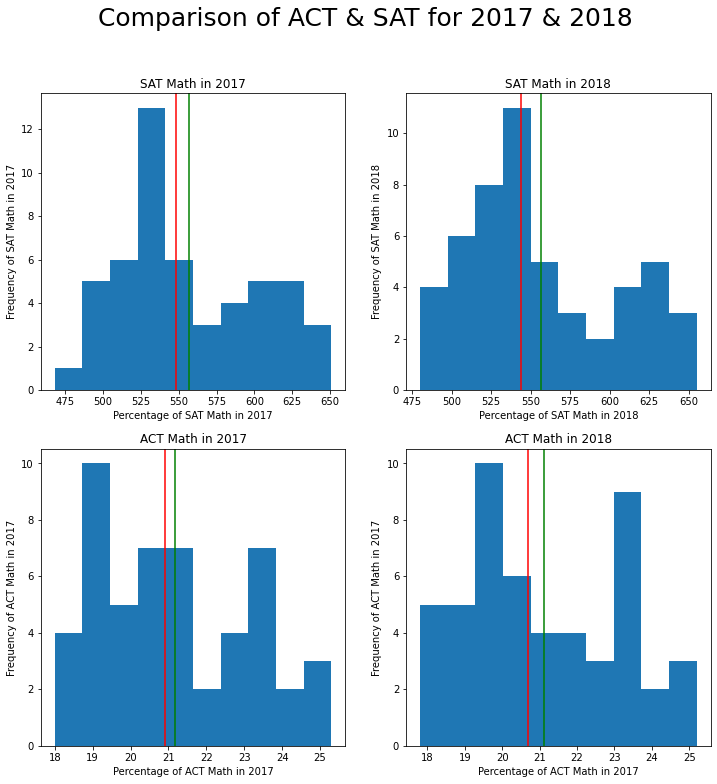

In [84]:
math_a = ["sat_math_2017", "sat_math_2018", "act_math_2017", "act_math_2018"]
math_b = ["SAT Math in 2017", "SAT Math in 2018", "ACT Math in 2017", "ACT Math in 2018"]
math_c = ["Percentage of SAT Math in 2017", "Percentage of SAT Math in 2018", 
         "Percentage of ACT Math in 2017", "Percentage of ACT Math in 2017"]
math_d = ["Frequency of SAT Math in 2017", "Frequency of SAT Math in 2018", 
         "Frequency of ACT Math in 2017", "Frequency of ACT Math in 2017"]
subplot_histograms(combined_final, math_a, math_b, math_c, math_d)
#subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels)

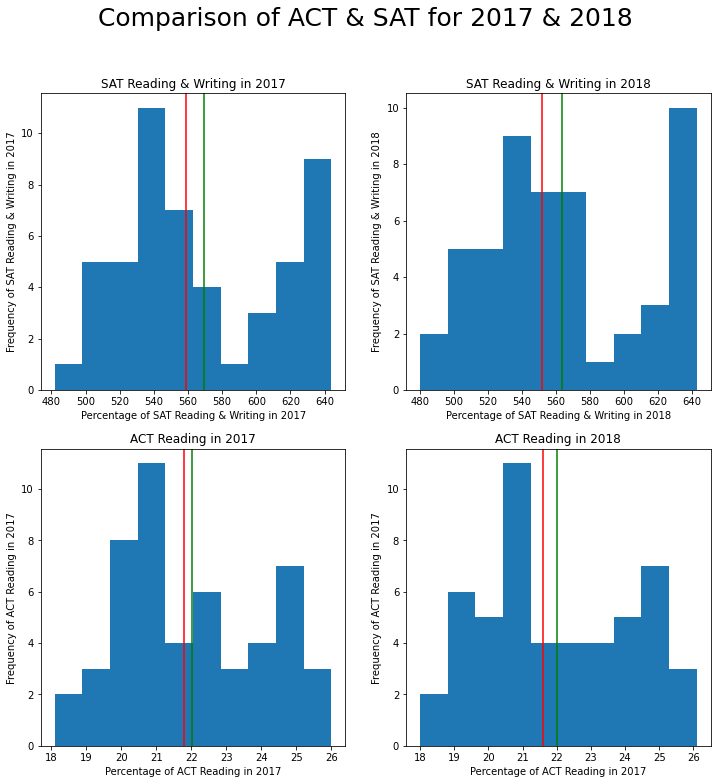

In [85]:
read_a = ["sat_evidence_based_reading_and_writing_2017", "sat_evidence_based_reading_and_writing_2018", 
          "act_reading_2017", "act_reading_2018"]
read_b = ["SAT Reading & Writing in 2017", "SAT Reading & Writing in 2018", "ACT Reading in 2017", "ACT Reading in 2018"]
read_c = ["Percentage of SAT Reading & Writing in 2017", "Percentage of SAT Reading & Writing in 2018", 
         "Percentage of ACT Reading in 2017", "Percentage of ACT Reading in 2017"]
read_d = ["Frequency of SAT Reading & Writing in 2017", "Frequency of SAT Reading & Writing in 2018", 
         "Frequency of ACT Reading in 2017", "Frequency of ACT Reading in 2017"]
subplot_histograms(combined_final, read_a, read_b, read_c, read_d)
#subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


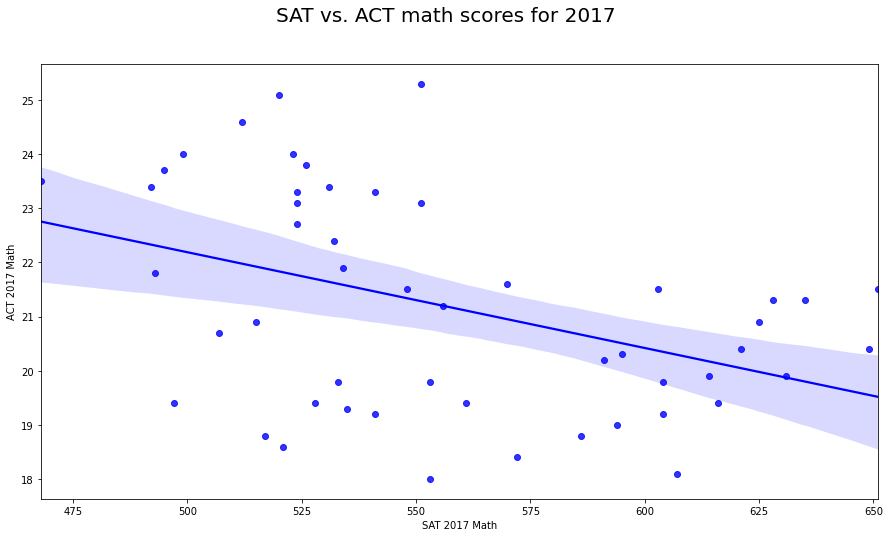

In [86]:
# SAT vs. ACT math scores for 2017
plt.figure(figsize=(15,8))
ax = sns.regplot(x=combined_final["sat_math_2017"], y=combined_final['act_math_2017'], color="blue")
plt.suptitle("SAT vs. ACT math scores for 2017", fontsize=20)
ax.set(xlabel='SAT 2017 Math', ylabel='ACT 2017 Math');

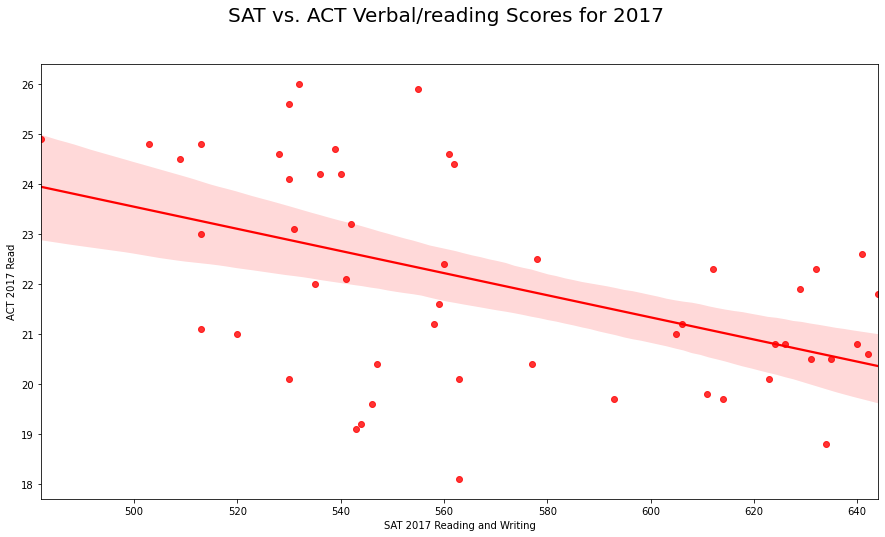

In [87]:
# SAT vs. ACT verbal/reading scores for 2017
plt.figure(figsize=(15,8))
ax = sns.regplot(x=combined_final["sat_evidence_based_reading_and_writing_2017"], y=combined_final['act_reading_2017'], color="red")
plt.suptitle("SAT vs. ACT Verbal/reading Scores for 2017", fontsize=20)
ax.set(xlabel='SAT 2017 Reading and Writing', ylabel='ACT 2017 Read');

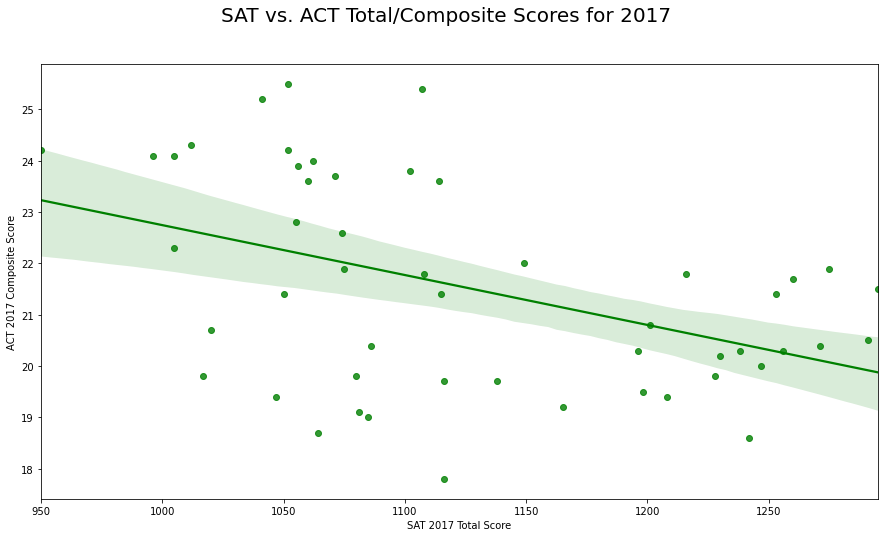

In [88]:
# SAT vs. ACT total/composite scores for 2017
plt.figure(figsize=(15,8))
plt.suptitle("SAT vs. ACT Total/Composite Scores for 2017", fontsize=20)
ax = sns.regplot(x=combined_final["sat_total_2017"], y=combined_final['act_composite_2017'], color="green")
ax.set(xlabel='SAT 2017 Total Score', ylabel='ACT 2017 Composite Score');

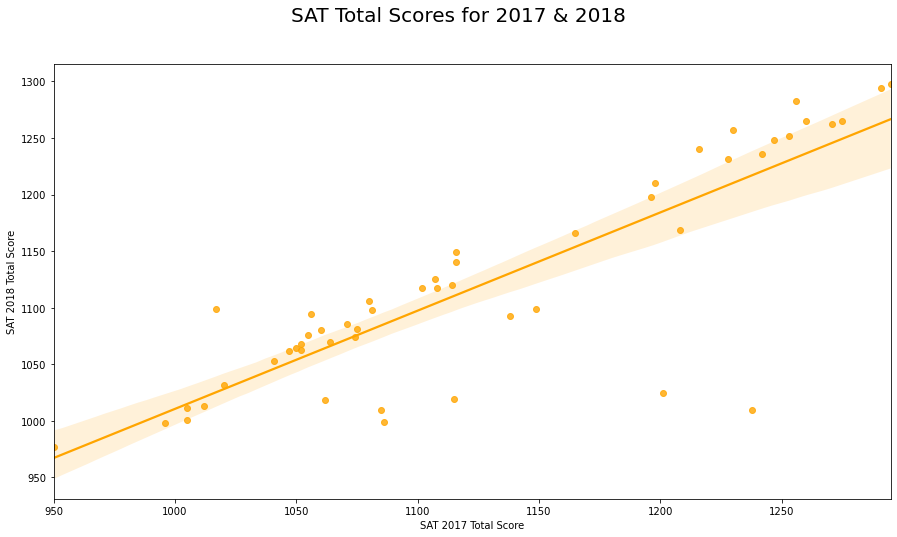

In [89]:
# Total scores for SAT 2017 vs. 2018
plt.figure(figsize=(15,8))
plt.suptitle("SAT Total Scores for 2017 & 2018", fontsize=20)
ax = sns.regplot(x=combined_final["sat_total_2017"], y=combined_final['sat_total_2018'], color="orange")
ax.set(xlabel='SAT 2017 Total Score', ylabel='SAT 2018 Total Score');

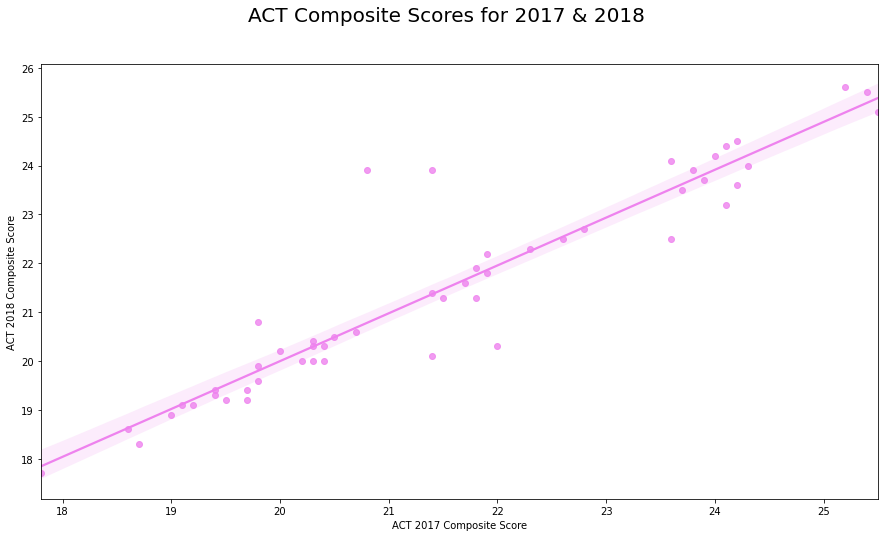

In [90]:
# Composite scores for ACT 2017 vs. 2018
plt.figure(figsize=(15,8))
ax = sns.regplot(x=combined_final["act_composite_2017"], y=combined_final['act_composite_2018'], color="violet")
plt.suptitle("ACT Composite Scores for 2017 & 2018", fontsize=20)
ax.set(xlabel='ACT 2017 Composite Score', ylabel='ACT 2018 Composite Score');

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [91]:
combined_final.describe()

,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_evidence_based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,sat_participation_2018,sat_evidence_based_reading_and_writing_2018,sat_math_2018,sat_total_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,39.803922,569.117647,556.882353,1126.098039,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,35.276632,45.666901,47.121395,92.494812,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,643.000000,655.000000,1298.000000


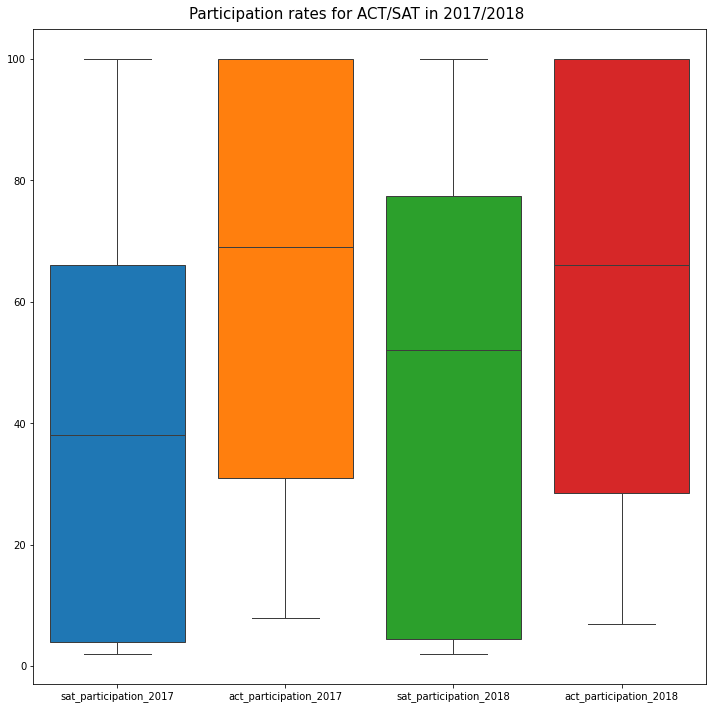

In [92]:
plt.figure(figsize=(10,10))
sns.boxplot(data=combined_final[["sat_participation_2017", 'act_participation_2017', 
                                 'sat_participation_2018', 'act_participation_2018']],
           fliersize=8, linewidth=1, saturation =1.0, notch=False);
plt.suptitle("Participation rates for ACT/SAT in 2017/2018", fontsize=15)
plt.tight_layout();

For SAT participation between 2017 and 2018: <br>
(1) The IQR has expanded higher which means there is an increase in participation rate in 2018<br>
(2) With the higher participation rate, the mean in 2018 is higher than 2017<br><br>

For ACT participation between 2017 and 2018: <br>
(1) The IQR has expanded slightly at the lower quadrant which means there is a slight decrease participation rate in 2018<br>
(12 With the slight decrease in participation rate, the mean in 2018 is slightly lower than 2017 <br><br>

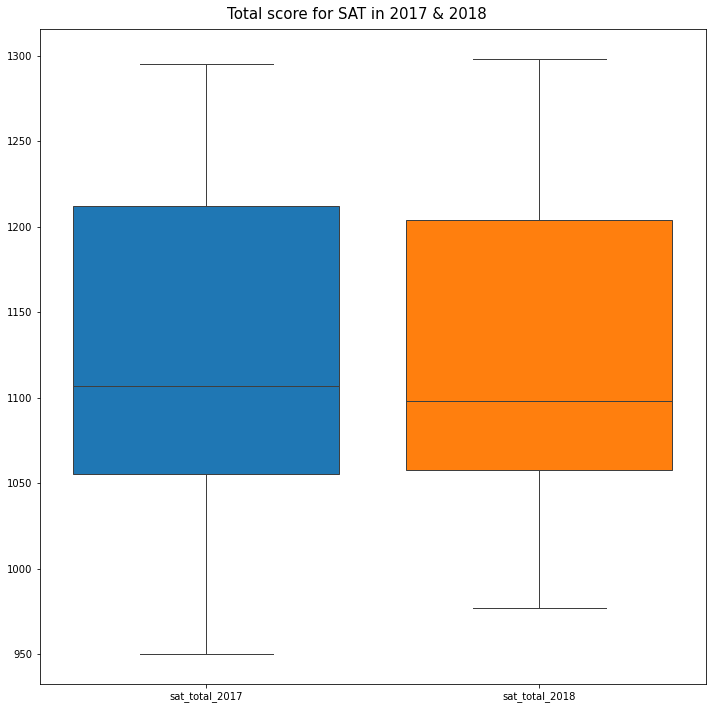

In [93]:
plt.figure(figsize=(10,10))
sns.boxplot(data=combined_final[["sat_total_2017", 'sat_total_2018']],
           fliersize=8, linewidth=1, saturation =1.0, notch=False);
plt.suptitle("Total score for SAT in 2017 & 2018", fontsize=15)
plt.tight_layout();

For the total score for SAT in 2017 and 2018: <br>
(1) The IQR is slightly smaller meaning there is a slight decrease in total score in 2018<br>
(2) With the decrease in total score for 2018, the mean in 2018 is lower than 2017<br><br>

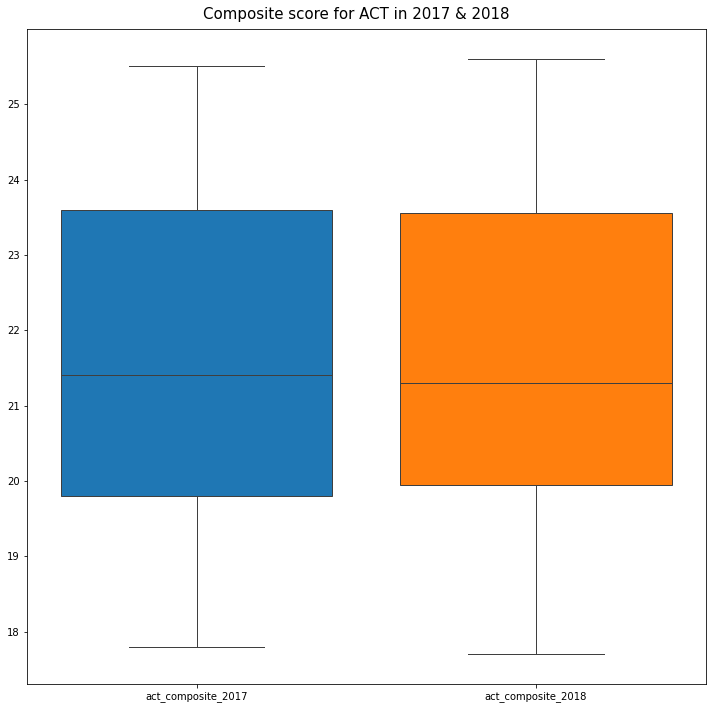

In [94]:
plt.figure(figsize=(10,10))
sns.boxplot(data=combined_final[["act_composite_2017", 'act_composite_2018']],
           fliersize=8, linewidth=1, saturation =1.0, notch=False);
plt.suptitle("Composite score for ACT in 2017 & 2018", fontsize=15)
plt.tight_layout();

For the Composite score for ACT in 2017 and 2018: <br>
(1) The plot is almost similar year on year, with 2018 being slightly smaller than 2017.<br><br>

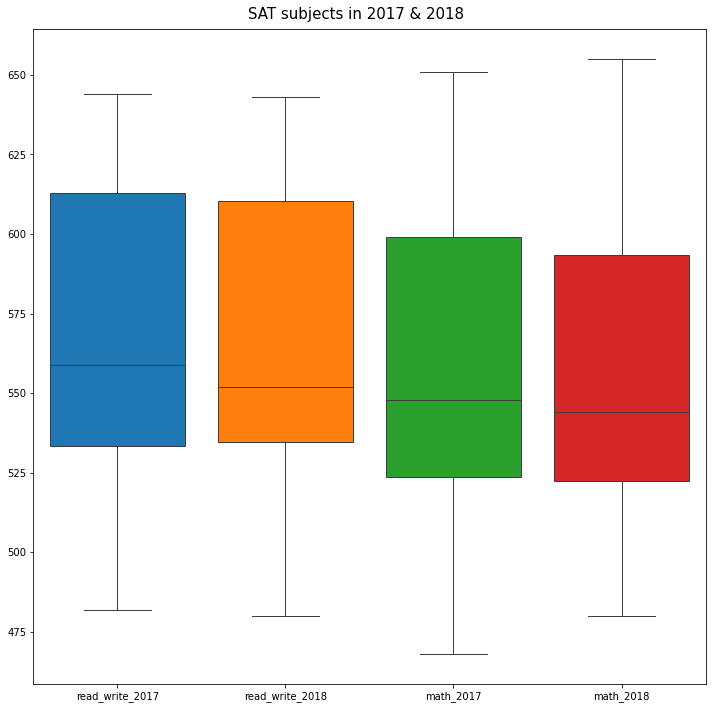

In [95]:
plt.figure(figsize=(10,10))
sns.boxplot(data=combined_final[['sat_evidence_based_reading_and_writing_2017', 'sat_evidence_based_reading_and_writing_2018',
                     'sat_math_2017', 'sat_math_2018',]],
           fliersize=8, linewidth=1, saturation =1.0, notch=False);
plt.xticks([0, 1, 2, 3],['read_write_2017', 'read_write_2018', 'math_2017', 'math_2018'])
plt.suptitle("SAT subjects in 2017 & 2018", fontsize=15)
plt.tight_layout();

For the subject scoring for SAT in 2017 and 2018: <br>
(1) Generally, people tends to score better in Evidence-based Reading and Writing as compared to Maths when comparing both years.
(2) The scores were better in 2017 as compared to 2018. <br><br>

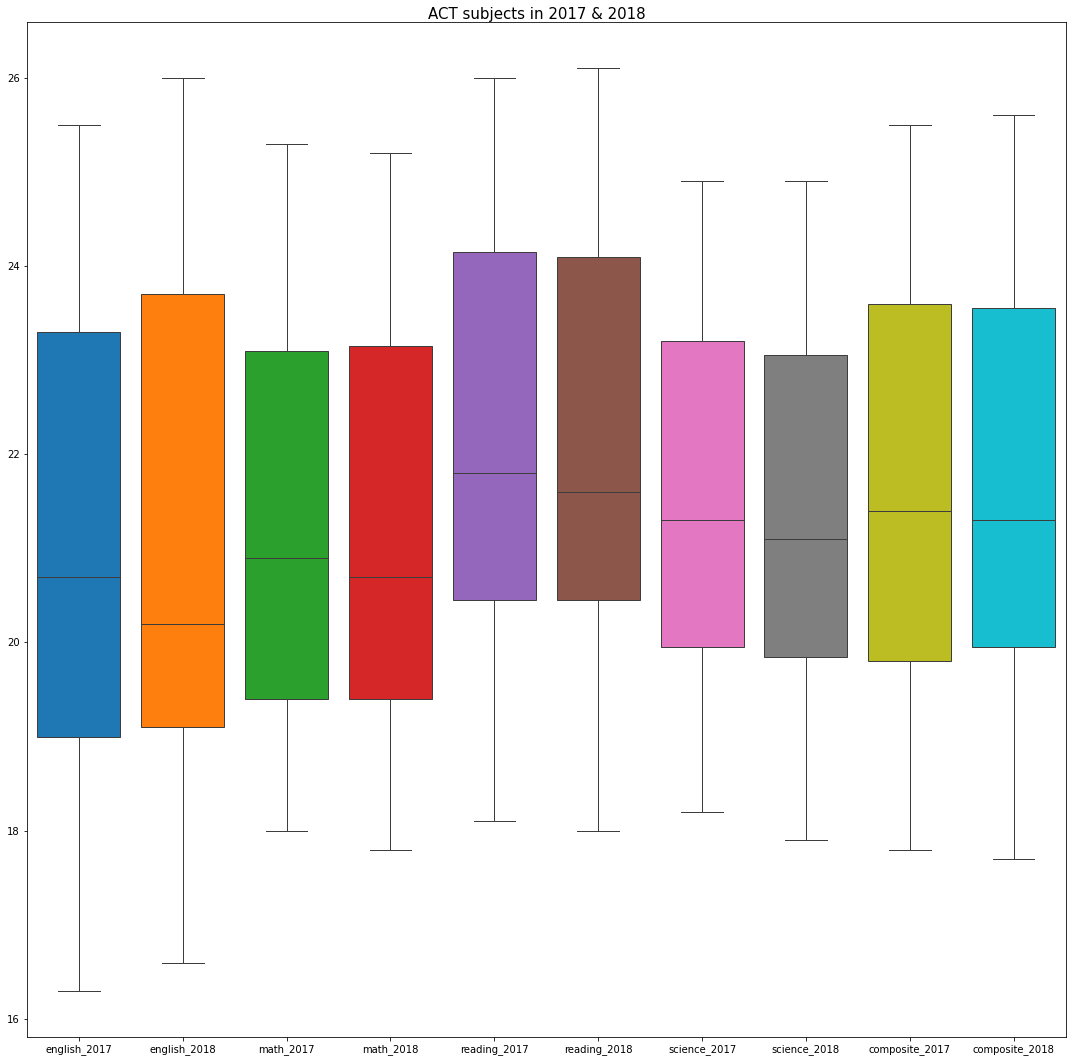

In [96]:
plt.figure(figsize=(15,15))
sns.boxplot(data=combined_final[['act_english_2017', 'act_english_2018',
                     'act_math_2017', 'act_math_2018',
                     'act_reading_2017', 'act_reading_2018',
                     'act_science_2017', 'act_science_2018',
                     'act_composite_2017', 'act_composite_2018']],
           fliersize=8, linewidth=1, saturation =1.0, notch=False);
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
           ['english_2017', 'english_2018', 
            'math_2017', 'math_2018',
            'reading_2017', 'reading_2018',
            'science_2017', 'science_2018',
            'composite_2017', 'composite_2018'])
plt.suptitle("ACT subjects in 2017 & 2018", fontsize=15)
plt.tight_layout();

For the subject scoring for ACT in 2017 and 2018: <br>
(1) Generally, people tends to score better in Reading followed by Science, Math and English.<br>
(2) Comparing 2017 & 2018, there is an improvment in overall scoring for English and Math but decrease in Reading and Science.<br><br>

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

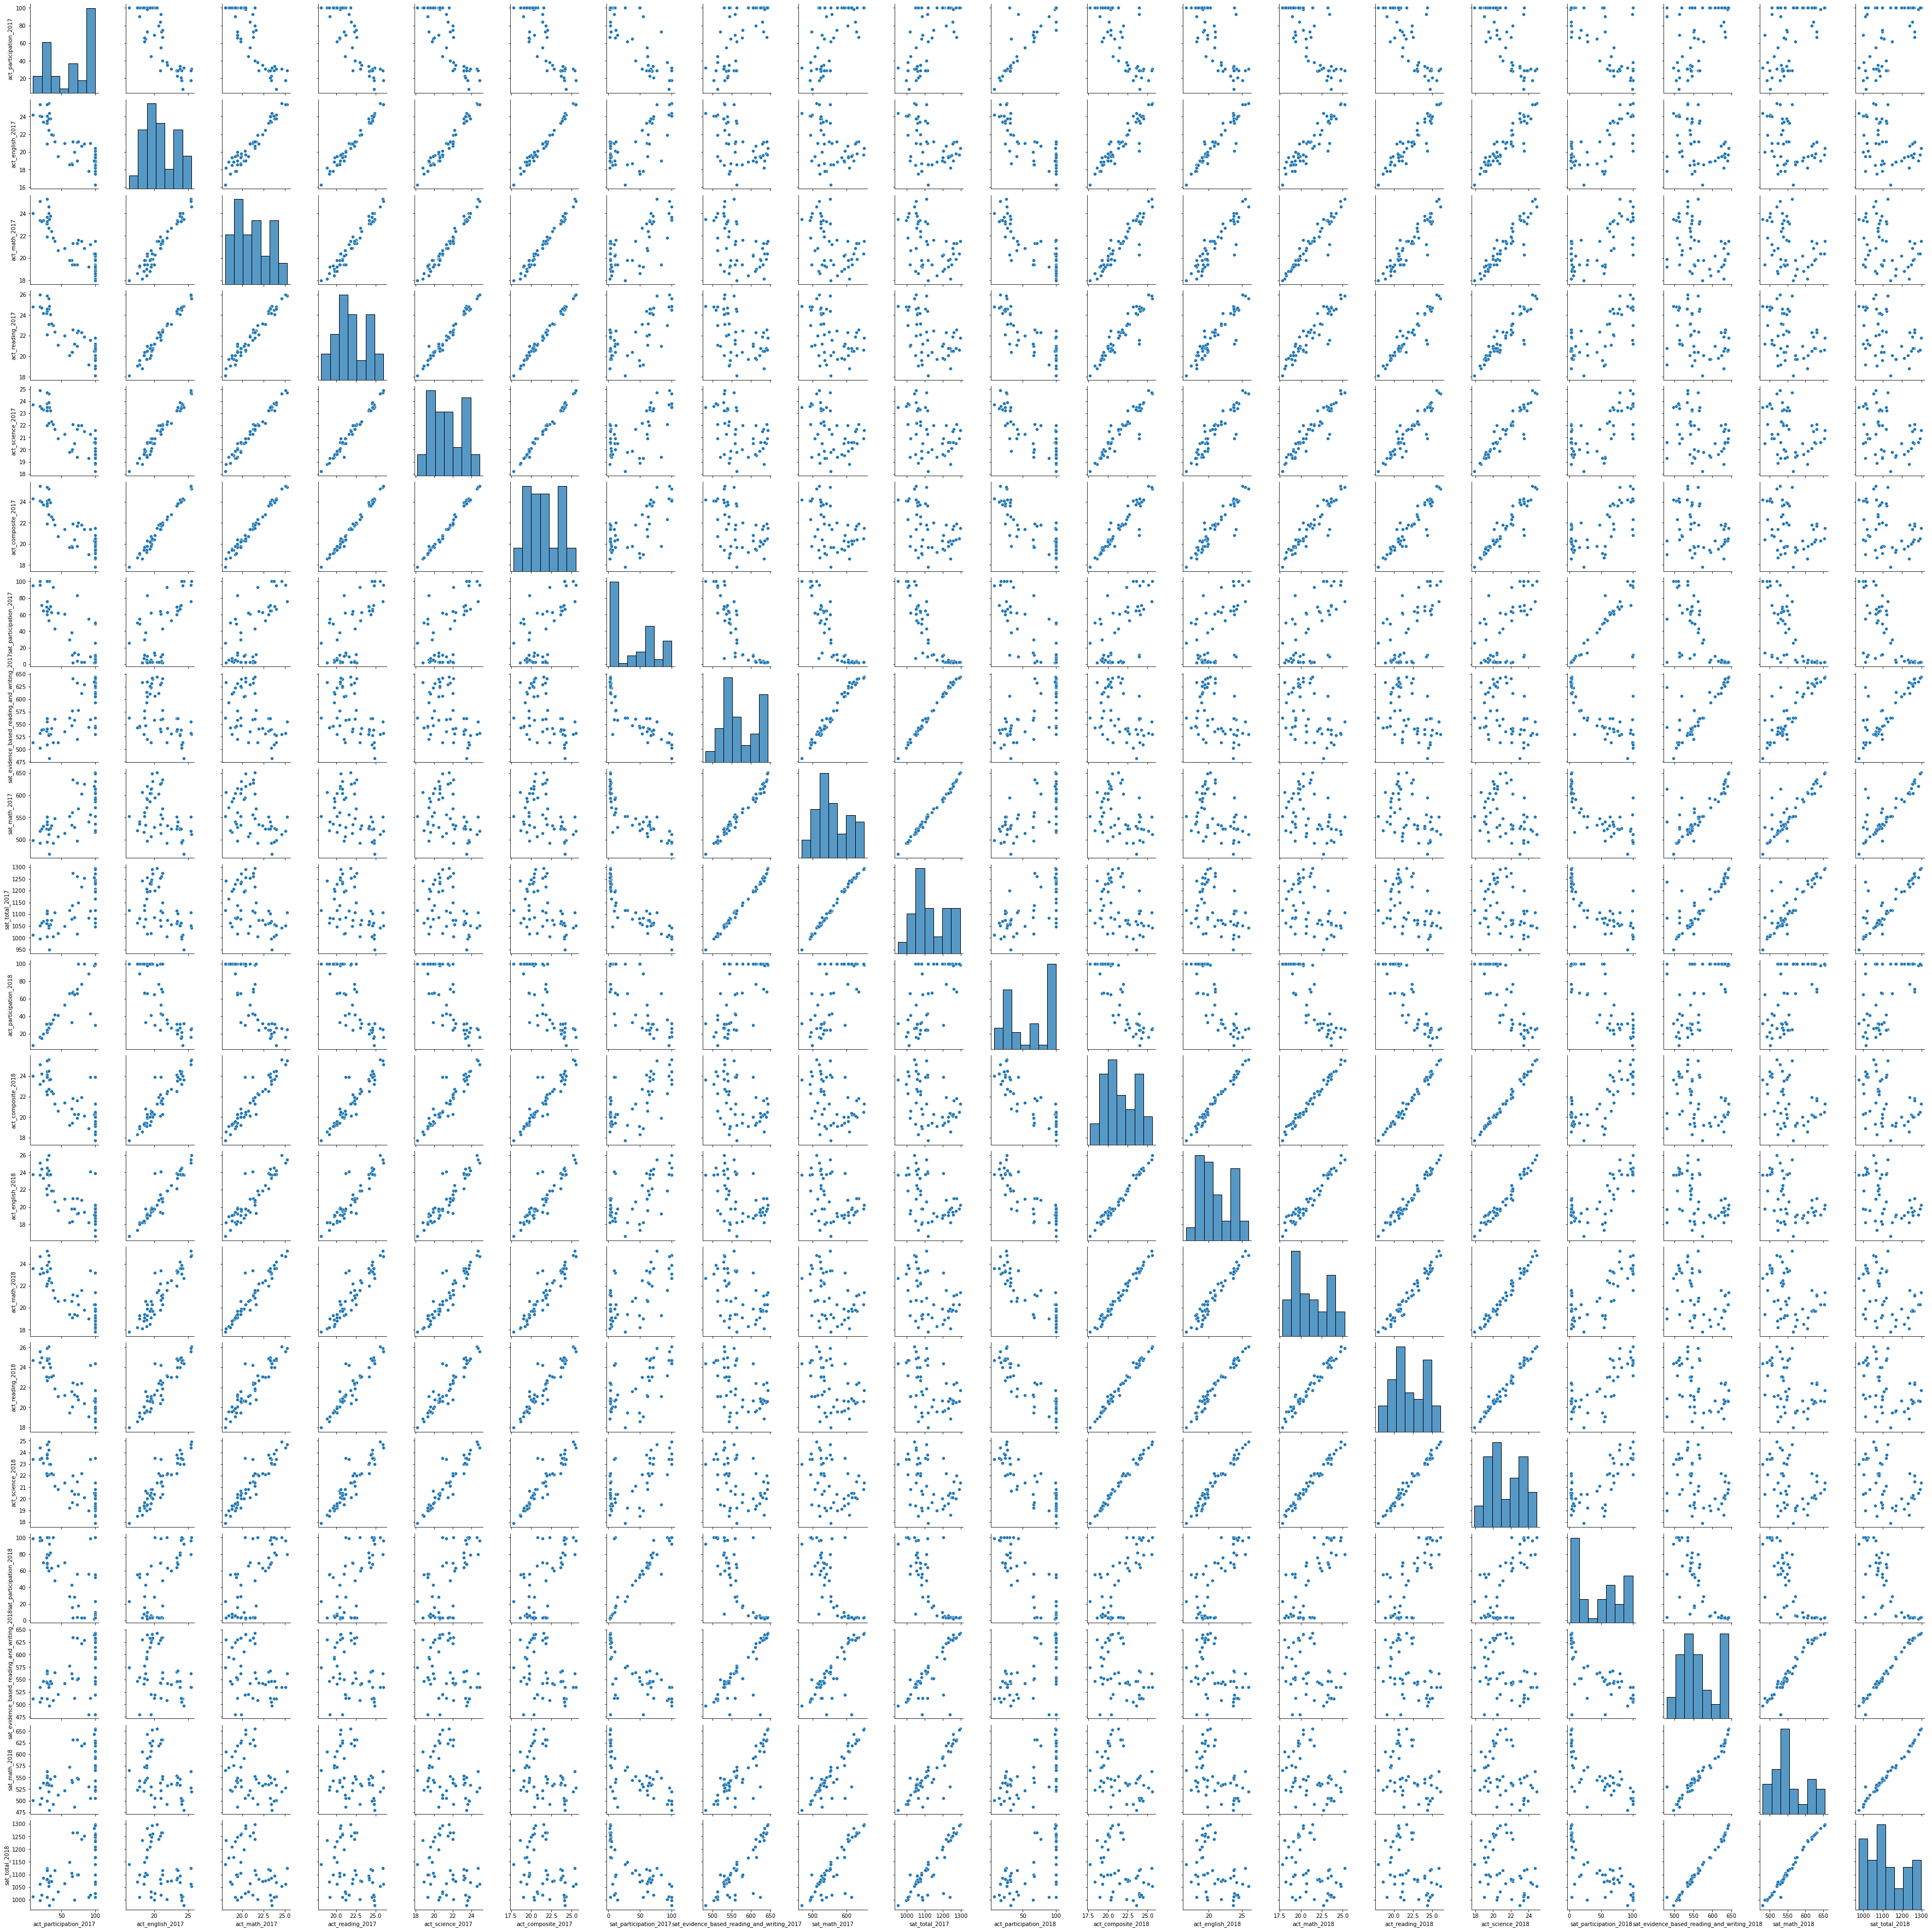

In [97]:
sns.pairplot(combined_final);

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

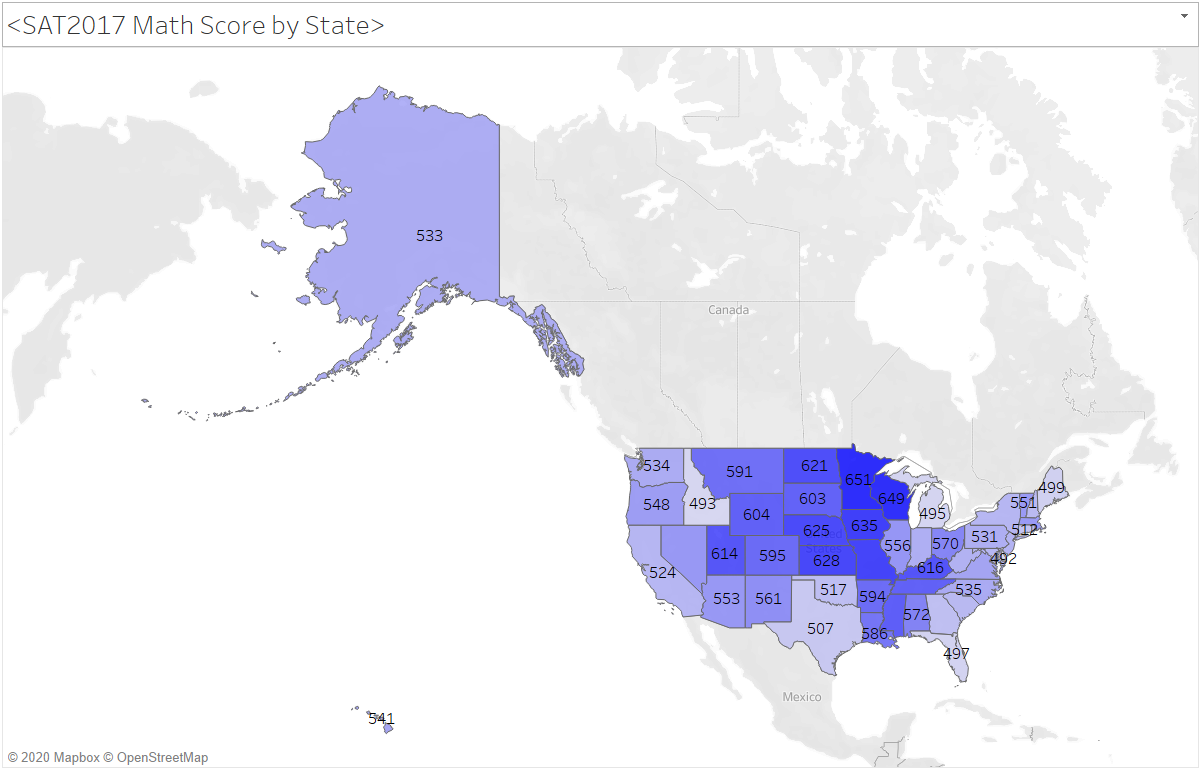

In [98]:
from IPython.display import Image
Image(filename=r'../data/tab_heatmap_sat_math_2017.png', width = 700, height = 700)

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

**Answer:**

|**S/N**|**Variable**|**Mean**|**Median**|**Standard Deviation**|**Shape/Skew**|
|---|---|---|---|---|---|
|1|act_participation_2017|65.25|69.00|32.14|Bimodal(left-skew)|
|2|     act_english_2017|20.93|20.70|2.35|left-skew|
|3|     act_math_2017|21.18|20.90|1.98|left-skew|
|4|     act_reading_2017|22.01|21.80|2.07|left-skew|
|5|     act_science_2017|21.45|21.3|1.74|slightly left-skew|
|6|     act_composite_2017|21.52|21.40|2.02|slightly left-skew|
|7|     sat_particpation_2017|39.80|38.00|35.27|Bimodal(right-skew)|
|8|     sat_evidence_based_reading _and_writing_2017|569.12|559.00|45.67|right skew|
|9|     sat_math_2017|556.88|548.00|47.12|right skew|
|10|     sat_total_2017|1126.10|1107.00|92.49|right skew|
|11|     act_participation_2018|61.65|66.00|34.08|left skew|
|12|     act_english_2018|20.99|20.20|2.45|right skew|
|13|     act_math_2018|21.13|20.70|2.04|right skew|
|14|     act_reading_2018|22.016|21.600|2.17|right skew|
|15|     act_science_2018|21.35|21.10|1.87|slightly right skew|
|16|     act_composite_2018|21.49|21.30|2.11|slight right skew|
|17|     sat_particpation_2018|45.75|52.00|37.31|Bimodal(right skew)|
|18|     sat_evidence_based_reading _and_writing_2018|563.69|552.00|47.50|slightly right skew|
|19|     sat_math_2018|556.24|544.00|47.77|slightly right skew|
|20|     sat_total_2018|1120.02|1098.00|94.16|slightly right skew| 

<br><br>

Source: <br>
Introduction to Descriptive Stats: http://faculty.smu.edu/kyler/courses/7311/Intro_Measures4up.pdf <br>
Determining Skewness of distrubition: https://reinec.medium.com/my-notes-handling-skewed-data-5984de303725 <br><br>


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

**Answer:**<br>
The data from ACT and SAT are not normallly distrubuted.<br><br>

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

**Answer:** <br>
The assumption does not hold for Math, Read and Participation rates as [based on the histogram plotted above](#Plot-and-interpret-histograms), the graph is not normally distrubuted. <br>
For Math and Reading, in SAT and ACT 2017 and 2018, all are right skew in terms of distribution.<br>
For SAT participation for both years(2017 & 2018), both are right skew and bimodal. ACT participation is left skew with presence of bimodal. This shows that ACT has overall higher participation for each state as compared to SAT.<br><br>

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

**Answer:**<br>
As the population in each state varies, coupled with the varying number of students attending school, some states should not be given equal weightage as compared to the others as it will lead to generalising the dataset which will end up manipulating the end results. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

**Answer:** <br>
Overall it would not be appropriate to compare SAT and ACT math scores based on the following arguements:<br>
(1) The scoring parameters are different(SAT ranges from 200-800 while ACT ranges from 1-36) and the scatterplot futher supports the arguement<br>
(2) The question types in SAT and ACT is different (Source: https://blog.prepscholar.com/sat-math-vs-act-math-whats-the-difference)<br>
(3)Comparison of apple to an orange as the focus is different and the test method differs. (Source: https://www.collegeraptor.com/getting-in/articles/act-sat/myth-sat-math-is-harder-than-act-math/) <br><br>

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

**Answer:**<br>
Source: https://blog.prepscholar.com/which-states-require-the-sat, https://www.hanoverresearch.com/media/Best-Practices-to-Increase-SAT-Participation-1.pdf

The outside research targets two group of states (1) States with SAT requirement and (2) States without SAT Requirement. Within these groups, some states in the second group benefitted from the SAT School Days. 

In [99]:
#to find states with 100% SAT participation rate year on year
research_a = combined_final.loc[(combined_final["sat_participation_2017"] == 100 ) & (combined_final["sat_participation_2018"] == 100 )]
research_a[["state", "sat_participation_2017", "sat_participation_2018"]]

,state,sat_participation_2017,sat_participation_2018
6,Connecticut,100.0,100.0
7,Delaware,100.0,100.0
22,Michigan,100.0,100.0


In [100]:
# to find out the SAT total score with the highest and lowest participation rate 
display_n(combined_final[["state", 'sat_participation_2018', 'sat_total_2018']].sort_values('sat_participation_2018'), 5)

,state,sat_participation_2018,sat_total_2018
34,North Dakota,2.0,1283
50,Wyoming,3.0,1257
41,South Dakota,3.0,1240
27,Nebraska,3.0,1252
49,Wisconsin,3.0,1294
...,...,...,...
5,Colorado,100.0,1025
6,Connecticut,100.0,1053
7,Delaware,100.0,998
22,Michigan,100.0,1011


In [105]:
combined_final[["state", 'sat_participation_2018', 'sat_total_2018']].sort_values('sat_total_2018', ascending = False).tail(3)

,state,sat_participation_2018,sat_total_2018
48,West Virginia,28.0,999
7,Delaware,100.0,998
8,District of Columbia,92.0,977


In [106]:
combined_final[["state", 'sat_participation_2018', 'sat_total_2018']].sort_values('sat_total_2018', ascending = False).head(3)

,state,sat_participation_2018,sat_total_2018
23,Minnesota,4.0,1298
49,Wisconsin,3.0,1294
34,North Dakota,2.0,1283


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

**Recommendations:** <br>

**Short-Term Goals**<br>

(1) Increased emphasis to SAT School Days:<br> 
SAT School Day offers graduating students to take their test in their school, on a weekday. It benefits the students as it is more convenient and the settings are familiar setting as they will be using the same location and staff for the test. Apart from that, fee waiver benefits will also be awarded to students with low-income families.<br>
- States with decreased participation rate year-on-year: District of Columbia has a 100% participation rate in 2017 but it was decreased to 92% in 2018
- States that has low participation rate in SAT: Tennessee, Oklahoma, Ohio <br><br> 

(2) Social Media Marketing:<br> 
No mandate certain states like Alaska. Hence, awareness for peaks of SAT should be spread to students<br> 
Advertising spreads awareness and postivity always bring postive results and carries positive influence. <br> 
Marketing Strategy:<br> 
(a)SAT's revamp, key differences between SAT and ACT:<br> 
- Eliminated testing of obscure vocabulary words
- Dropped the penalty for wrong answers
- More time to answer each question
(b)Highlight success stories through social media posts
- States with highest total score (Minnesota, Wisconsin, North Dakota)
- State with 100% participation rate (Connecticut, Delaware and Michigan) <br><br>


**Long-Term Goals**<br>
Work towards mandating SAT at a state-level with College Board’s support for states without mandate on any particular test. 
As findings indicates that state mandates and policies impacts participation rates (example: States such as Mississippi, Missouri and Nebraska mandated ACT resulting in 100% participation rates for the test). With effort to push for mandating SAT, College Board can offer support like the situation in Illinois and Colorado where there was a successful transition from non-mandated to mandated SAT. <br>
Focus on states that does not mandate a particular test <br>
Potential targets: (1) Alaska, (2) Florida and (3) North Dakota<br>
Means: <br>
Additional subsidies to support the participants from low income families<br>
Offering free tuition classes to maintain/improve the state score<br>
